# Example Strategy/Backtest

#### Imports

In [9]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
import tabulate
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import analytics.tears as tears
from IPython.display import display
from Queue import Queue
from utils.stock import Stock
from stock_backtest.data_handler import StockBacktestDataHandler
from stock_backtest.execution_handler import StockBacktestExecutionHandler
from stock_backtest.backtest import StockBacktest
from strategies.buy_strategy import BuyStrategy
import analytics.plotting as plot
from analytics.plotting import plot_holdings

## Run the backtest 

In [10]:
events = Queue()
products = [Stock('MSFT'), Stock('ORCL')]
symbols = [product.symbol for product in products]
start_date = dt.datetime(year=2012, month=1, day=1)
end_date = dt.datetime(year=2016, month=1, day=10)
data = StockBacktestDataHandler(events, symbols, start_date, end_date)
execution = StockBacktestExecutionHandler(events)
strategy = BuyStrategy(events, data, products, initial_cash=100000)
backtest = StockBacktest(events, strategy, data, execution, start_date, end_date)
backtest.run()

STARTING BACKTEST 
Strategy: BuyStrategy 
Execution: StockBacktestExecutionHandler 
Start: 1/1/2012 00:00, End: 1/10/2016 00:00 



In [11]:
positions_cols = [product.symbol for product in products] + ['cash']
positions = pd.DataFrame(np.array([strategy.time_series[product.symbol] for product in products]
                         + [strategy.time_series['cash']]).transpose(), columns=positions_cols,
                         index=strategy.time_series.index)
display(positions.tail(5))
display(strategy.transactions.tail(5))
display(strategy.time_series.tail(5))

,MSFT,ORCL,cash
dt,,,
2016-01-04,-134496.320000,-75440.945810,283277.604266
2016-01-05,-135896.820000,-76274.222127,284321.284202
2016-01-06,-134061.760000,-73485.000000,281947.684145
2016-01-07,-128693.402442,-71769.000000,279328.364145
2016-01-08,-133072.167459,-68187.331941,281196.914244


,amount,price,symbol
dt,,,
2016-01-06,34.0,35.500000,ORCL
2016-01-07,-99.0,52.700001,MSFT
2016-01-07,95.0,35.250000,ORCL
2016-01-08,-34.0,52.369999,MSFT
2016-01-08,28.0,35.130001,ORCL


,MSFT_mkt,ORCL_mkt,MSFT_pos,ORCL_pos,cash,MSFT,ORCL,total_val,returns
dt,,,,,,,,,
2016-01-04,54.320000,36.009998,-2476.0,-2095.0,283277.604266,-134496.320000,-75440.945810,73340.338456,0.089060
2016-01-05,54.930000,35.860001,-2474.0,-2127.0,284321.284202,-135896.820000,-76274.222127,72150.242075,-0.016227
2016-01-06,54.320000,35.500000,-2468.0,-2070.0,281947.684145,-134061.760000,-73485.000000,74400.924145,0.031194
2016-01-07,52.700001,35.250000,-2442.0,-2036.0,279328.364145,-128693.402442,-71769.000000,78865.961703,0.060013
2016-01-08,52.369999,35.130001,-2541.0,-1941.0,281196.914244,-133072.167459,-68187.331941,79937.414844,0.013586


Backtest Months: 48


Performance statistics,Backtest
annual_return,-0.05
annual_volatility,0.27
sharpe_ratio,-0.08
calmar_ratio,-0.13
stability_of_timeseries,-0.87
max_drawdown,-0.43
omega_ratio,0.98
sortino_ratio,-0.11
skew,0.42
kurtosis,10.59


Worst Drawdown Periods,net drawdown in %,peak date,valley date,recovery date,duration
0,43.04,2012-05-21,2014-12-24,NaT,NaN
1,1.64,2012-04-11,2012-05-01,2012-05-09,21
2,0.90,2012-02-23,2012-03-16,2012-04-04,30
3,0.45,2012-05-09,2012-05-10,2012-05-16,6
4,0.13,2012-01-09,2012-01-11,2012-01-17,7




[-0.034 -0.071]


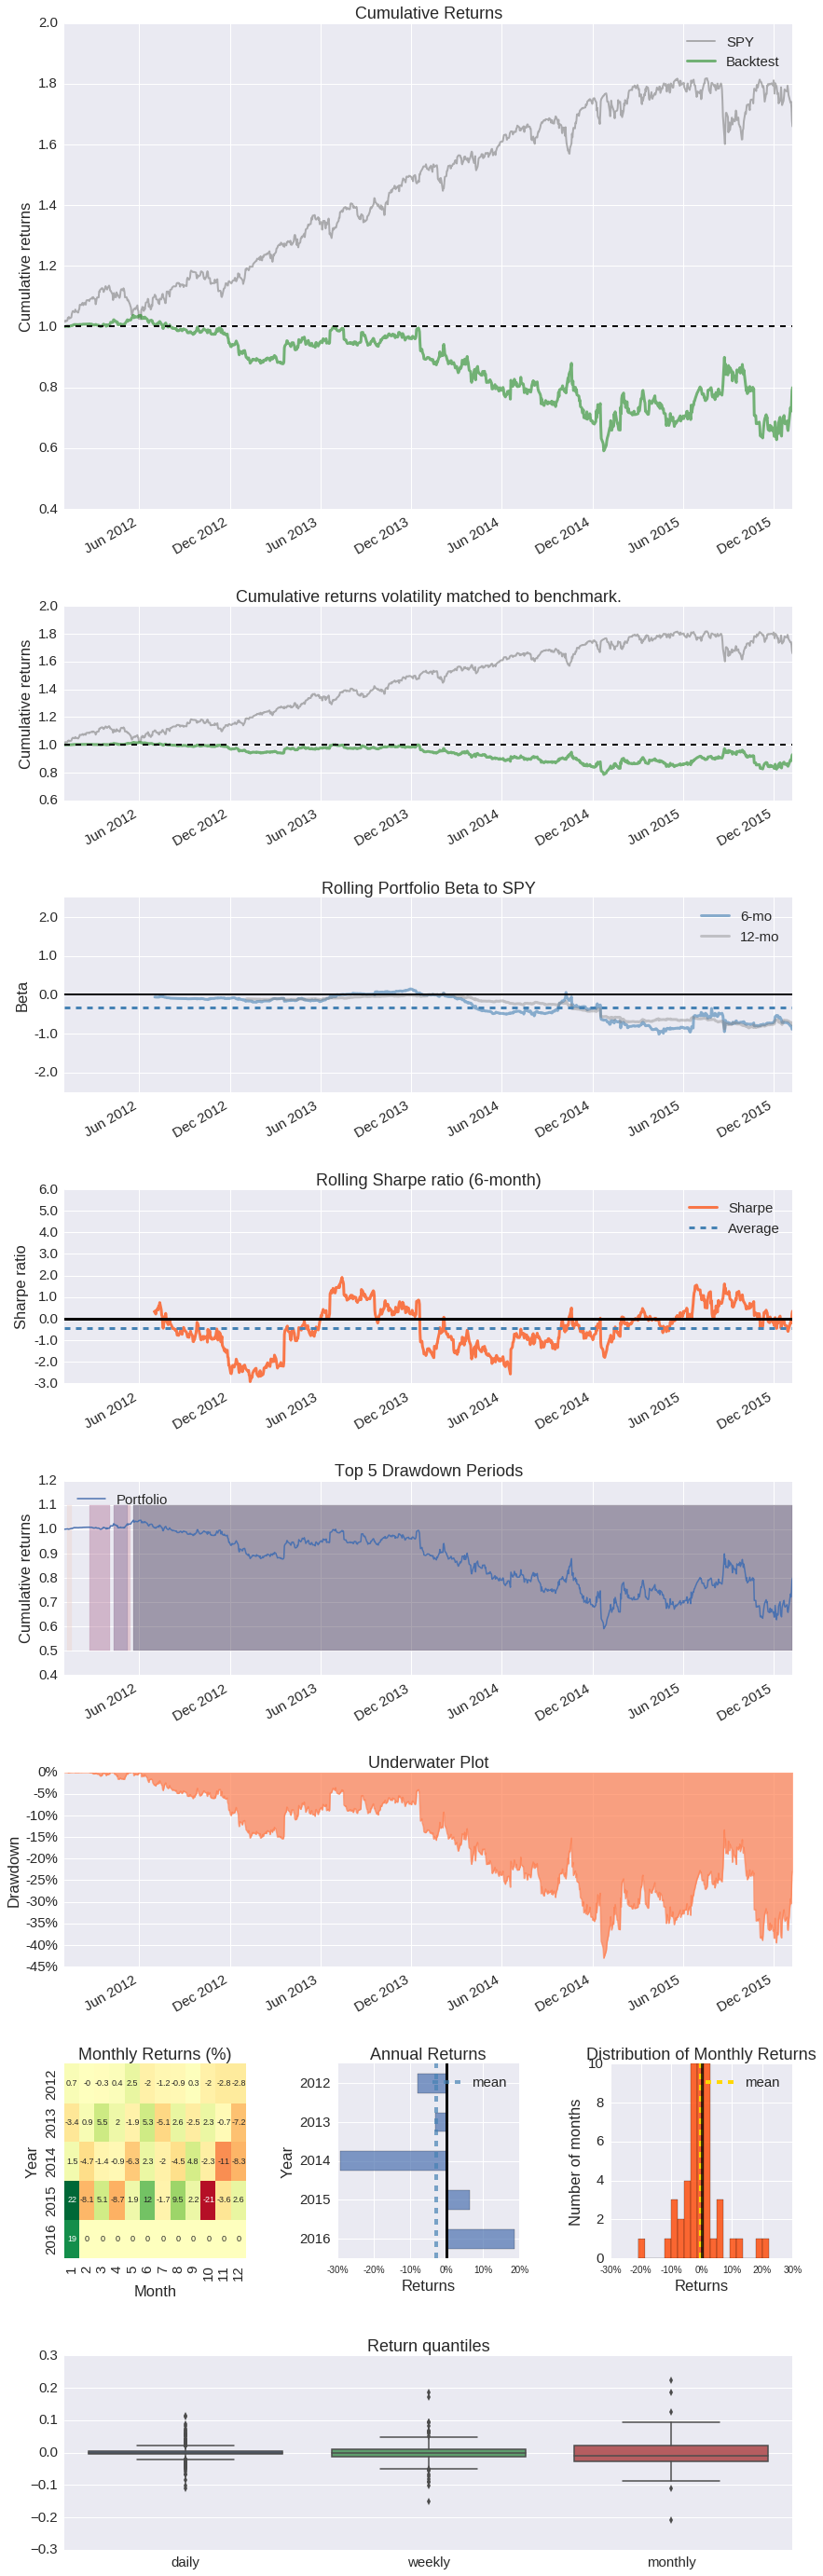

In [12]:
returns_tear = tears.create_returns_tear_sheet(strategy.time_series['returns'])

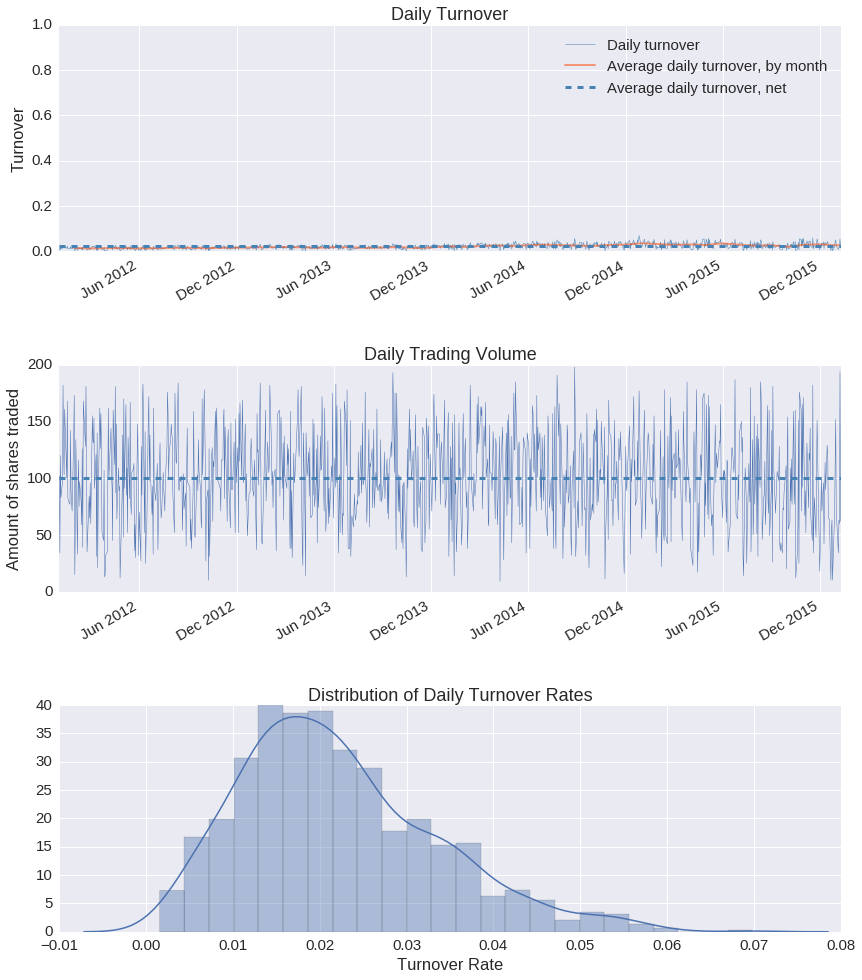

In [13]:
transactions_tear = tears.create_txn_tear_sheet(strategy.time_series['returns'], positions, strategy.transactions)

                       duration           pnl    returns
count                        35     35.000000  35.000000
mean    83 days 18:30:50.542857   -550.447006  -0.003561
std    263 days 17:42:39.833927   3034.720557   0.019124
min             0 days 23:59:59 -14966.901066  -0.056435
25%             1 days 11:59:59    -28.289889  -0.016947
50%             3 days 23:59:59     -3.220000  -0.003289
75%            16 days 23:59:59     40.995067   0.011086
max          1388 days 00:00:00   2818.701330   0.028693
Percent of round trips profitable = 40.0%
Mean return per winning round trip = 0.01464
Mean return per losing round trip = -0.0157
A decision is made every 28.89 days.
0.03462 trading decisions per day.
0.727 trading decisions per month.


Profitability (PnL / PnL total) per name,pnl
symbol,
ORCL,0.77%
MSFT,0.23%


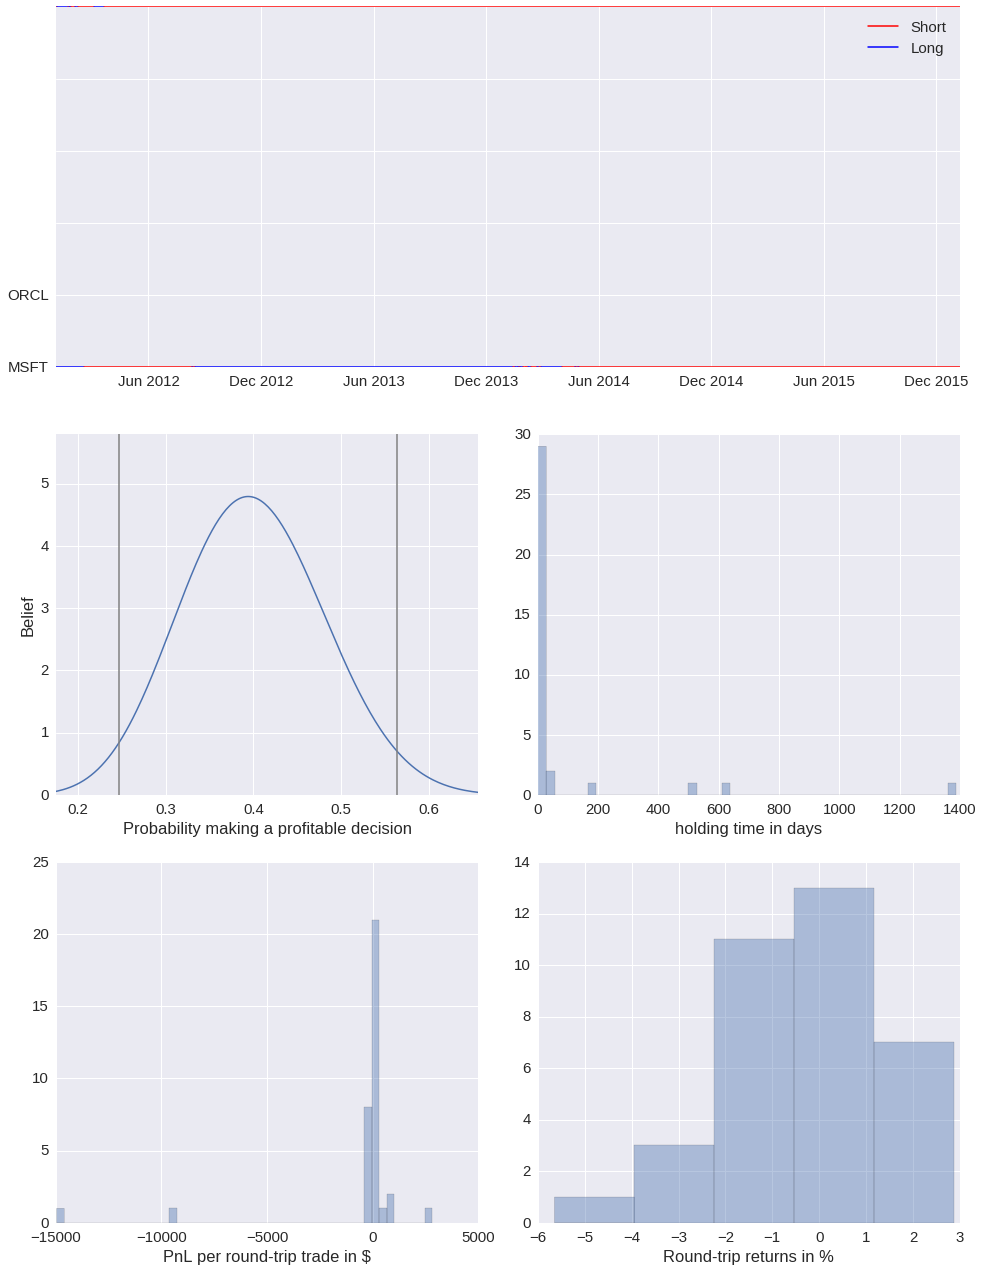

In [14]:
round_trips_tear = tears.create_round_trip_tear_sheet(positions, strategy.transactions)